# Sales Data Analysis

 Import required libraries

In [2]:
import pandas as pd
import numpy as np
import glob

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

Join the monthly Datasets to one Dataset

In [4]:
path = r"C:\Users\tanma\OneDrive\Desktop\Sales Project"

filenames = glob.glob(path +"/*.csv")

df = pd.concat([pd.read_csv(f) for f in filenames], ignore_index=True)

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


Save the raw dataset to the system

In [3]:
df.to_csv("all_months_data", index = False)

Drop null values

In [5]:
df.dropna(inplace=True)

In [6]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

Explore the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


Change Object dtype

In [8]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

C:\Users\tanma\AppData\Local\Temp\ipykernel_18284\13081262.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Order Date"] = pd.to_datetime(df["Order Date"])


DateParseError: Unknown datetime string format, unable to parse: Order Date, at position 517

Find out the reason of the error

In [9]:
display(df.iloc[517])

Order ID                    Order ID
Product                      Product
Quantity Ordered    Quantity Ordered
Price Each                Price Each
Order Date                Order Date
Purchase Address    Purchase Address
Name: 519, dtype: object

Drop these duplicate rows

In [9]:
f_df = df[df["Order ID"].str.contains("Order ID")]
f_df


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [10]:
df= df[df["Order ID"].str.contains("Order ID") == False]

In [11]:
f_df = df[df["Order ID"].str.contains("Order ID")]
f_df


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [12]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

C:\Users\tanma\AppData\Local\Temp\ipykernel_1880\13081262.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Order Date"] = pd.to_datetime(df["Order Date"])


In [14]:
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])

In [15]:
df["Price Each"] = pd.to_numeric(df["Price Each"])

In [17]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

Q1 - What was the best month for sales? How much was the sales? 

In [22]:
df["Sales"] = df["Quantity Ordered"]*df["Price Each"]

In [23]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99


In [49]:
monthly_sales = df.groupby(df["Order Date"].dt.month)["Sales"].sum().reset_index(name="Monthly Sales")

monthly_sales

,Order Date,Monthly Sales
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


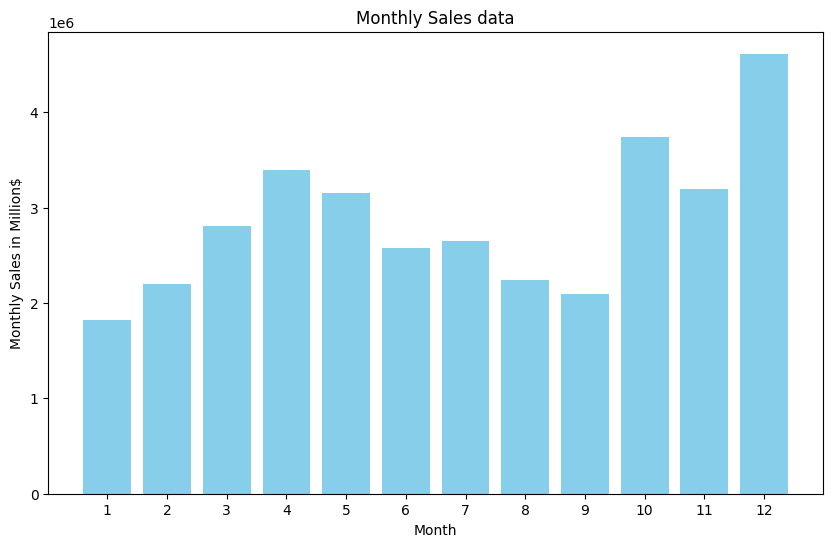

In [55]:
plt.figure(figsize=(10,6))
plt.bar(monthly_sales["Order Date"],monthly_sales["Monthly Sales"],color = "skyblue")
plt.xlabel("Month")
plt.ylabel("Monthly Sales in Million$")
plt.title("Monthly Sales data")
plt.xticks(monthly_sales["Order Date"])
plt.show()

Q2 - What city had the highest number of sales?

In [57]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4


In [65]:
df["City"] = df["Purchase Address"].apply(lambda x: x.split(",")[1])


In [79]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,Los Angeles


In [84]:
city_sales = df.groupby(df["City"])["Sales"].sum().reset_index(name = "Sales")
city_sales

,City,Sales
0,Atlanta,2795498.58
1,Austin,1819581.75
2,Boston,3661642.01
3,Dallas,2767975.40
4,Los Angeles,5452570.80
5,New York City,4664317.43
6,Portland,2320490.61
7,San Francisco,8262203.91
8,Seattle,2747755.48


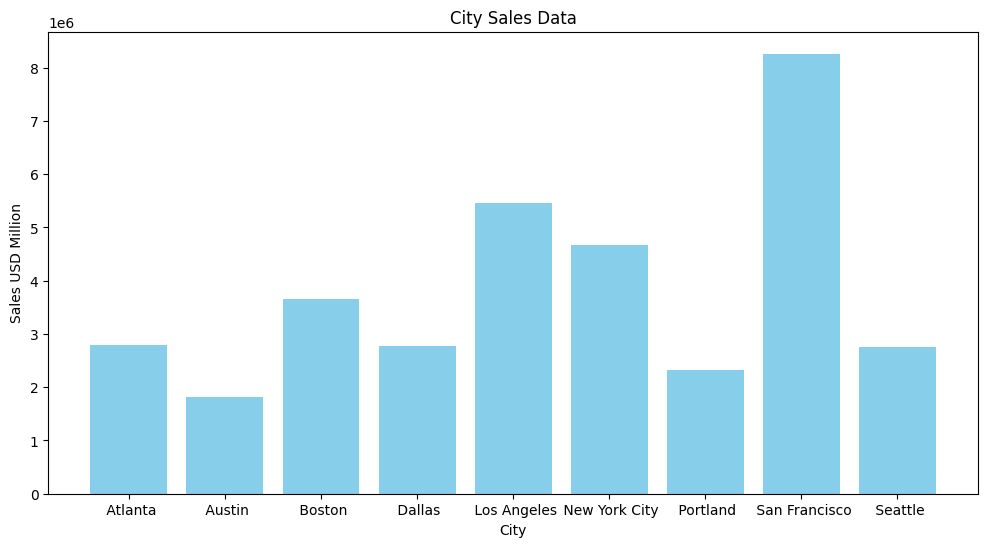

In [90]:
plt.figure(figsize=(12,6))
plt.bar(city_sales["City"],city_sales["Sales"],color = "skyblue")
plt.xlabel("City")
plt.ylabel("Sales USD Million")
plt.title("City Sales Data")
plt.show()


What time we should advertise to maximise sales?

In [97]:
Hourly_Sales = df.groupby(df["Order Date"].dt.hour)["Sales"].count().reset_index(name = "Sales")
Hourly_Sales.rename(columns = {"Order Date":"Hour"},inplace=True)
Hourly_Sales

,Hour,Sales
0,0,3910
1,1,2350
2,2,1243
3,3,831
4,4,854
5,5,1321
6,6,2482
7,7,4011
8,8,6256
9,9,8748


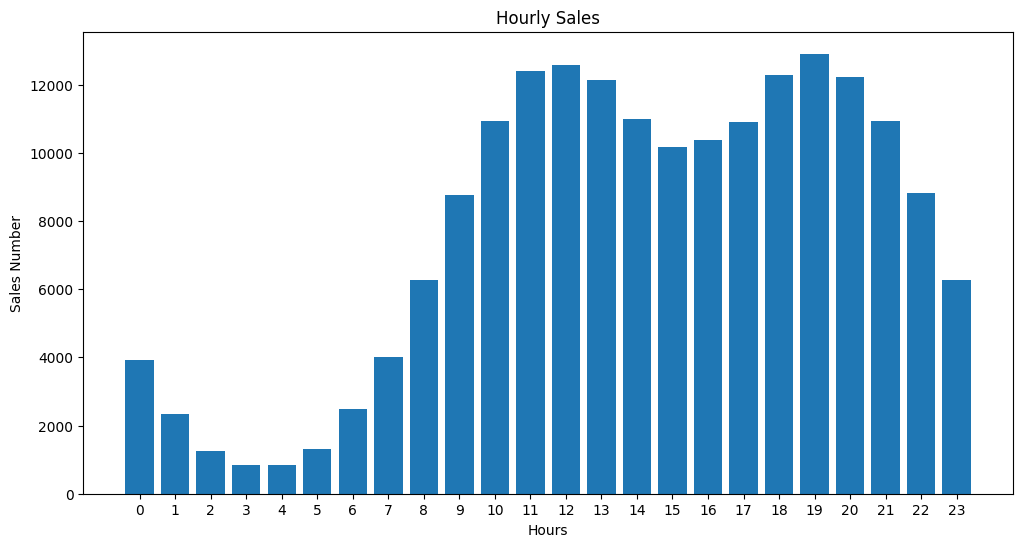

In [115]:

plt.figure(figsize=(12,6))
plt.bar(Hourly_Sales["Hour"], Hourly_Sales["Sales"])
plt.xlabel("Hours")
plt.ylabel("Sales Number")
plt.title("Hourly Sales")
plt.xticks(Hourly_Sales['Hour'])
plt.show()